"The translation must contain only the lemma of the translated verb. For example, it should not contain 'to'"+

"Purpose of the translation: To study the accuracy of LLMs on Low resource languages, particularly Darija." + 

"Target audience: Computational linguists"   

In [1]:
from openai import OpenAI
import pandas as pd

# Initialize the OpenAI client
client = OpenAI()

# Load the DataFrame containing verbs
df = pd.read_csv('verbs.csv')

# Define a translation function using the OpenAI API
def translate_verb(verb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English."},
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect verbs into English using word-by-word translation. The output must not be an infinitive verb. No explanations are needed in the output"},
            {"role": "assistant", "content": "OK, I understand. I am ready for the verb translation."},
            {"role": "user", "content": f"{verb}"},
        ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

# Apply the translation function to the 'darija_ar' column
df['english_translation'] = df['darija_ar'].apply(translate_verb)

# Display or save the resulting DataFrame
print(df)


In [13]:
from openai import OpenAI
client = OpenAI()
import pandas as pd
# dataframe and load of verbs
df = pd.read_csv('verbs.csv')
darija = df['darija_ar'].tolist()

eng = df['eng']

transl = []

for verb in darija:
    completion = client.chat.completions.create(
    model =  "gpt-3.5-turbo",
    messages = [
    {"role": "system", 
     "content":                
     "You are an expert in Moroccan Darija dialect and in translating Darija to English."
     },          
    {"role": "user", 
     "content":                
     "Translate the provided Moroccan Darija dialect verbs into English using word-by-word translation. The output must not be an infinitive verb. No explanations are needed in the output"
     },            
    {"role": "assistant", "content": "OK, I understand. I am ready for the verb translation."},

    {"role": "user", "content": "شرب"},

    {"role": "assistant", "content": "drink"},

    {"role": "user", "content": "ستدعا"},

    {"role": "assistant", "content": "summon"},

#instead of will call

    {"role": "user", "content": "طفا"},

    {"role": "assistant", "content": "turn off"},
        
    {"role": "user", "content":  f'{verb}' }
    

    ],

    temperature=0.1, # deterministic
    )
    transl.append(completion.choices[0].message.content)

print(transl)

['to eat', 'to drink', 'to enter', 'to go out', 'to understand', 'to explain', 'to read', 'to read', 'to hear', 'to see', 'to smell', 'to taste', 'to measure', 'to go', 'to come', 'to go out', 'to go down', 'to announce', 'to drown', 'to wear', 'to ask', 'to buy', 'to sell', 'to repent', 'to write', 'to wipe', 'to hit', 'to surrender', 'to tire', 'to whisper', 'to laugh', 'to get angry', 'to bring', 'to be', 'to run', 'to say', 'to say', 'to have', 'to tighten', 'to think', 'to come', 'to find', 'to give', 'to work', 'to shout', 'to lose', 'to feel', 'to refuse', 'to put', 'to have', 'to start', 'to lose', 'to find', 'to like', 'to inform', 'to help', 'to free', 'to find', 'to secure', 'to try', 'to try', 'to suggest', 'to think', 'to go', 'to explain', 'to play', 'to run', 'to run', 'to read', 'to start', 'to ask', 'to cut', 'to speak', 'to thank', 'to change', 'to complete', 'to agree', 'to wish', 'to follow', 'to kiss', 'to refuse', 'to fall', 'to lock', 'to win', 'to increase', 'to

['eat', 'drink', 'enter', 'go_out', 'understand', 'explain', 'read', 'read', 'hear', 'see', 'smell', 'taste', 'measure', 'go', 'come', 'go_out', 'go_down', 'announce', 'drown', 'wear', 'ask', 'buy', 'sell', 'repent', 'write', 'wipe', 'hit', 'surrender', 'tire', 'whisper', 'laugh', 'get_angry', 'bring', 'be', 'run', 'say', 'say', 'have', 'tighten', 'think', 'come', 'find', 'give', 'work', 'shout', 'lose', 'feel', 'refuse', 'put', 'have', 'start', 'lose', 'find', 'like', 'inform', 'help', 'free', 'find', 'secure', 'try', 'try', 'suggest', 'think', 'go', 'explain', 'play', 'run', 'run', 'read', 'start', 'ask', 'cut', 'speak', 'thank', 'change', 'complete', 'agree', 'wish', 'follow', 'kiss', 'refuse', 'fall', 'lock', 'win', 'increase', 'learn', 'wait', 'switch_off', 'sell', 'buy', 'solve', 'build', 'choose', 'arrive', 'decide', 'activate', 'watch', 'lose', 'walk', 'magnify', 'imagine', 'cause', 'crush', 'hear', 'grow', 'die', 'die', 'visit', 'encourage', 'protect', 'spread', 'kill', 'climb

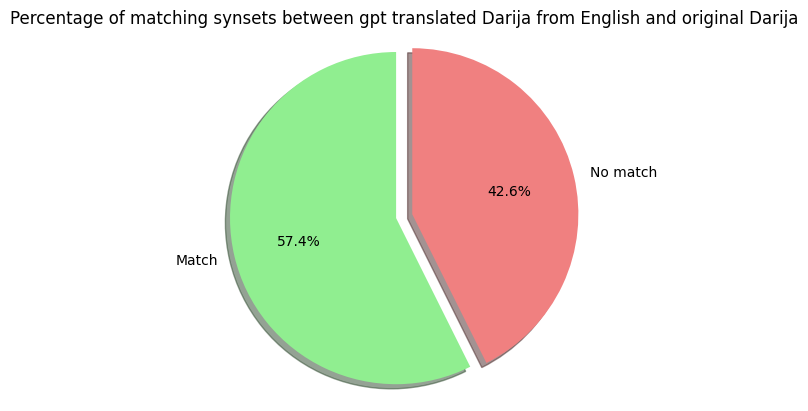

In [14]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

transl = [verb[3:].replace(" ", "_") if verb.startswith("to ") else verb for verb in transl]
print(transl)

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")
plt.show()

In [18]:
synsets1 = wn.synsets("go_out", pos=wn.VERB)
synsets2 = wn.synsets("exit", pos=wn.VERB)
max_score = 0

for syn1 in synsets1:
    for syn2 in synsets2:
        score = syn1.path_similarity(syn2)
        if score and score > max_score:
            max_score = score
print(max_score)

1.0
